In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
cleaned_path = 'outputs/cleaned.jsonl'

In [4]:
cleaned_objs = []
with open(cleaned_path, encoding='utf-8') as inf:
    for line in inf:
        cleaned_obj = json.loads(line)
        cleaned_objs.append(cleaned_obj)

In [5]:
keys = cleaned_objs[0].keys()
print(list(keys))

['text', 'url', 'lang', 'char_count', 'token_count', 'ascii_ratio', 'symbol_ratio', 'source']


In [18]:
def draw_hist(data):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.hist(data, bins=100)
    fig.tight_layout()
    plt.show()

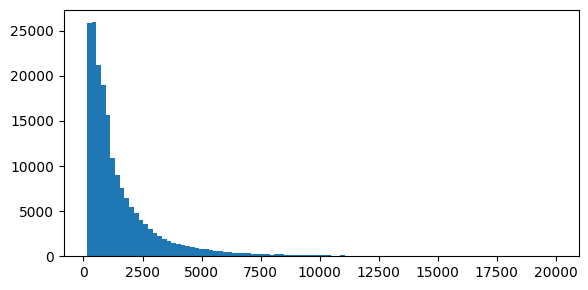

In [19]:
char_counts = []
for obj in cleaned_objs:
    char_counts.append(obj['char_count'])
draw_hist(char_counts)

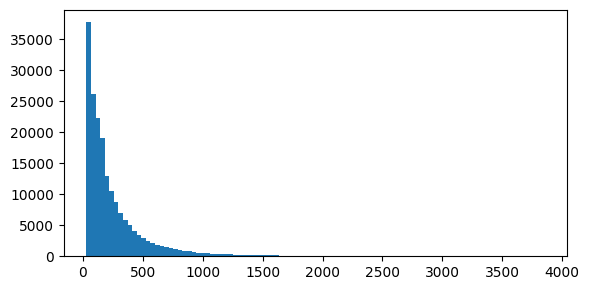

In [20]:
token_counts = []
for obj in cleaned_objs:
    token_counts.append(obj['token_count'])
draw_hist(token_counts)

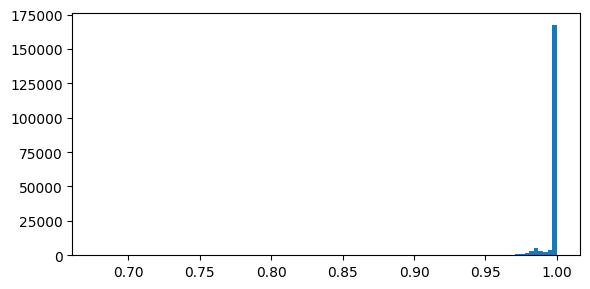

In [21]:
ascii_ratios = []
for obj in cleaned_objs:
    ascii_ratios.append(obj['ascii_ratio'])
draw_hist(ascii_ratios)

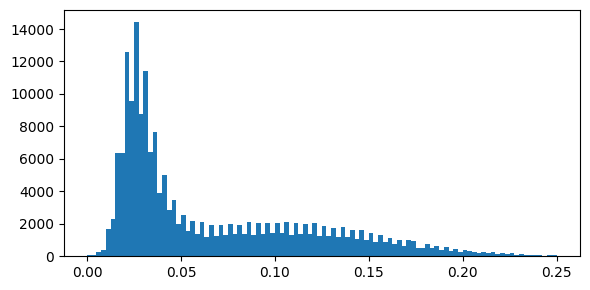

In [22]:
symbol_ratios = []
for obj in cleaned_objs:
    symbol_ratios.append(obj['symbol_ratio'])
draw_hist(symbol_ratios)

In [5]:
from fast_langdetect import detect

print(detect("Hello, world!", model="auto", k=1))
print(detect("fast-langdetect is an ultra-fast and highly accurate language detection library based on FastText, a library developed by Facebook. Its incredible speed and accuracy make it 80x faster than conventional methods and deliver up to 95% accuracy.", model="auto", k=1))

[{'lang': 'en', 'score': 0.336122989654541}]
[{'lang': 'en', 'score': 0.9485219120979309}]


In [24]:
from presidio_analyzer import AnalyzerEngine
from presidio_anonymizer import AnonymizerEngine
from presidio_anonymizer.entities import OperatorConfig

def anonymize_text(text):
    """
    Anonymize text by replacing PII with generic placeholders.

    Args:
        text (str): Input text to anonymize

    Returns:
        str: Anonymized text
    """
    # Initialize Presidio engines
    analyzer = AnalyzerEngine()
    anonymizer = AnonymizerEngine()

    # Analyze the text to find PII entities
    analyzer_results = analyzer.analyze(
        text=text,
        language='en',
        entities=["PERSON", "EMAIL_ADDRESS", "LOCATION"]  # Focus on person names
    )

    # Define anonymization operators
    # operators = {
    #     "PERSON": OperatorConfig("replace"),
    # }

    # Anonymize the detected entities
    anonymized_result = anonymizer.anonymize(
        text=text,
        analyzer_results=analyzer_results,
        # operators=operators
    )

    # Get the anonymized text
    anonymized_text = anonymized_result.text

    # Replace pronouns with gender-neutral alternatives
    pronoun_replacements = {
        " his ": " <HIS/HER> ",
        " His ": " <HIS/HER> ",
        " he ": " <HE/SHE> ",
        " He ": " <HE/SHE> ",
        " him ": " <HIM/HER> ",
        " Him ": " <HIM/HER> ",
        " himself ": " <HIMSELF/HERSELF> ",
        " Himself ": " <HIMSELF/HERSELF> ",
    }

    for original, replacement in pronoun_replacements.items():
        anonymized_text = anonymized_text.replace(original, replacement)

    return anonymized_text


# Example usage
if __name__ == "__main__":
#     text = """\
# John Smith was a quiet man who preferred spending his days alone. One \
# afternoon, he found himself lost in thought, wondering if he had made \
# the right decisions in life. His mind drifted back to the choices that \
# had led him to where he was, and he realized he had never really given \
# much thought to the future. Despite the uncertainty, John was content \
# with the man he had become, trusting in himself to navigate whatever came next. My email is isura@isura.me. I am from Kurunegala.\
# """

    text = "Hello there"

    print("Original Text:")
    print(text)
    print("\n" + "="*70 + "\n")

    anonymized = anonymize_text(text)

    print("Anonymized Text:")
    print(anonymized)

Original Text:
Hello there


Anonymized Text:
Hello there


In [26]:
from detoxify import Detoxify

detox_model = Detoxify('original-small')

In [28]:
detox_model.predict(['Hello there', 'You are a horrible person!'])

{'toxicity': [0.0008374202298000455, 0.9670803546905518],
 'severe_toxicity': [7.100565562723204e-05, 0.00866495631635189],
 'obscene': [0.00023014284670352936, 0.16295376420021057],
 'threat': [7.284669118234888e-05, 0.005215527024120092],
 'insult': [0.00015885646280366927, 0.6392959952354431],
 'identity_attack': [0.00011333387374179438, 0.018419833853840828]}